In [1]:
%config IPCompleter.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Tratando dados de treino

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

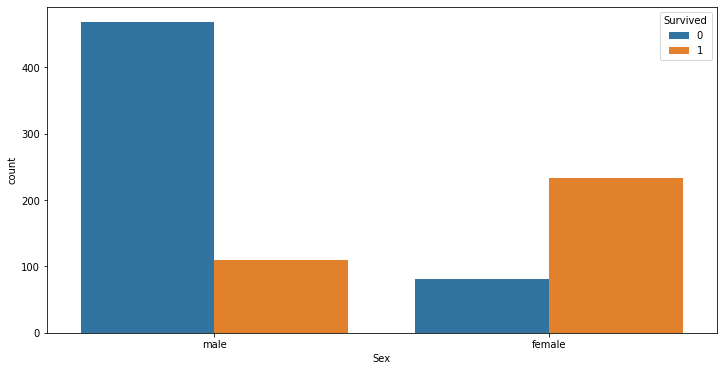

In [6]:
ax = plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='Sex', hue='Survived')

A proporção de mulheres que sobreviveram é maior do que a proporção de homens que sobreviveram.

In [7]:
def print_relacao_variavel_e_sobreviveu(variavel, valor):
    qtd_variavel = train.query(f'{variavel} == "{valor}"').shape[0]
    qtd_variavel_sobreviveram = train.query(f'{variavel} == "{valor}" and Survived == 1').shape[0]
    proporcao_variavel_sobreviveram = qtd_variavel_sobreviveram / qtd_variavel
    print(f'A proporção de {valor} que sobreviveram foi de {proporcao_variavel_sobreviveram * 100:.2f}%')

In [8]:
print_relacao_variavel_e_sobreviveu('Sex', 'female')
print_relacao_variavel_e_sobreviveu('Sex', 'male')

A proporção de female que sobreviveram foi de 74.20%
A proporção de male que sobreviveram foi de 18.89%


<AxesSubplot:xlabel='Pclass', ylabel='count'>

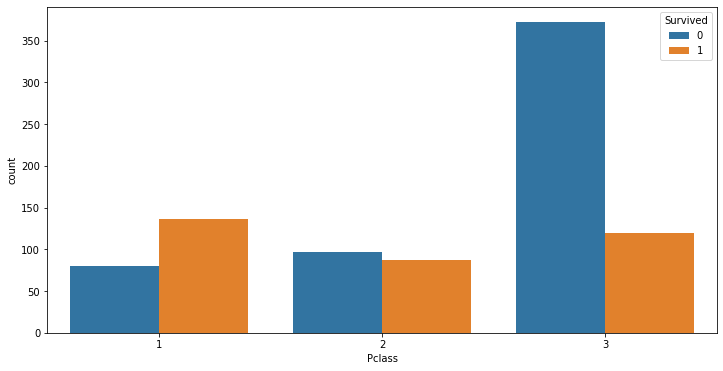

In [9]:
ax = plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='Pclass', hue='Survived')

A proporção que pessoas da terceira classe que morreram é maior do que das demais classes.

In [10]:
print_relacao_variavel_e_sobreviveu('Pclass', 1)
print_relacao_variavel_e_sobreviveu('Pclass', 2)
print_relacao_variavel_e_sobreviveu('Pclass', 3)

A proporção de 1 que sobreviveram foi de 62.96%
A proporção de 2 que sobreviveram foi de 47.28%
A proporção de 3 que sobreviveram foi de 24.24%


<AxesSubplot:xlabel='Embarked', ylabel='count'>

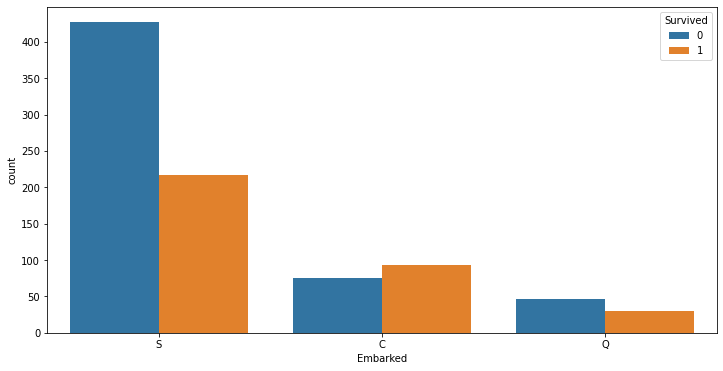

In [11]:
ax = plt.figure(figsize=(12, 6))
sns.countplot(data=train, x='Embarked', hue='Survived')

In [12]:
print_relacao_variavel_e_sobreviveu('Embarked', 'S')
print_relacao_variavel_e_sobreviveu('Embarked', 'C')
print_relacao_variavel_e_sobreviveu('Embarked', 'Q')

A proporção de S que sobreviveram foi de 33.70%
A proporção de C que sobreviveram foi de 55.36%
A proporção de Q que sobreviveram foi de 38.96%


<AxesSubplot:xlabel='Age', ylabel='Count'>

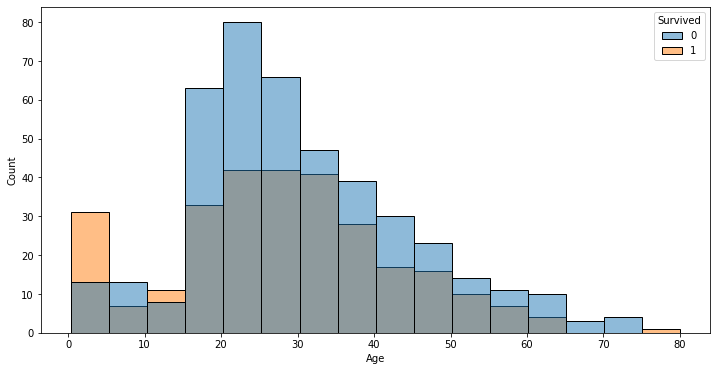

In [13]:
ax = plt.figure(figsize=(12, 6))
sns.histplot(data=train, x='Age', hue='Survived', bins=16)

In [14]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

In [15]:
nomes = train['Name'].str.split()
Ref = []
for i in range(len(nomes)):
    Ref.append(nomes[i][1])
Ref = pd.Series(Ref)
Ref.value_counts()
Ref2 = Ref.apply(lambda x: x if x in ['Mr.', 'Miss.', 'Mrs.', 'Master.'] else 'Other')
train['Ref'] = Ref2.map({'Other': 0,
                         'Mr.': 1,
                         'Miss.': 2,
                         'Mrs.': 3,
                         'Master.': 4})

In [16]:
train['Embarked'] = train['Embarked'].map({'S': 1, 'C': 2, 'Q': 3}).fillna(0)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ref
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
 12  Ref          891 non-null    int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 90.6+ KB


In [19]:
from sklearn.impute import KNNImputer

In [20]:
train2 = KNNImputer().fit_transform(train[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Ref']])

In [21]:
train['Age_filled'] = train2[:, 0]

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
 12  Ref          891 non-null    int64  
 13  Age_filled   891 non-null    float64
dtypes: float64(4), int64(7), object(3)
memory usage: 97.6+ KB


In [23]:
train.query('Age != Age_filled')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ref,Age_filled
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,3.0,1,47.4
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,1.0,1,30.0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,2.0,3,18.2
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,2.0,1,32.5
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,3.0,2,21.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",0,NaN,0,0,2629,7.2292,NaN,2.0,1,27.9
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69.5500,NaN,1.0,2,37.0
868,869,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,345777,9.5000,NaN,1.0,0,27.0
878,879,0,3,"Laleff, Mr. Kristo",0,NaN,0,0,349217,7.8958,NaN,1.0,1,28.0


<AxesSubplot:>

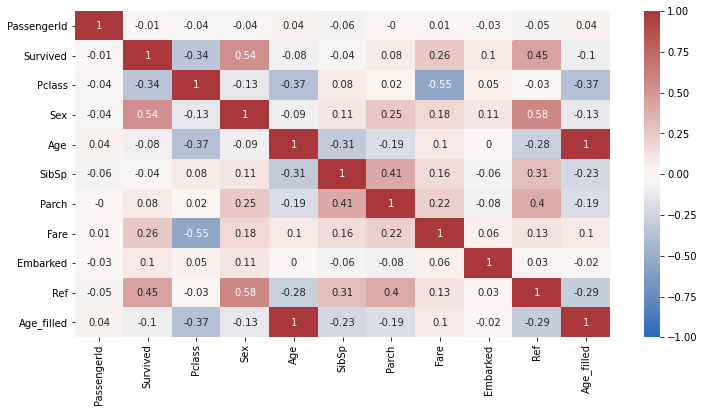

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.corr().round(2), vmin=-1, vmax=1, annot=True, cmap='vlag')

# Treino/Testes

In [25]:
X = train[['Sex', 'Ref', 'Pclass', 'Fare', 'Age_filled', 'Embarked', 'Parch', 'SibSp']]

In [26]:
y = train['Survived']

## <font color='red'>Início dos testes</font>

In [27]:
import tensorflow
from tensorflow import keras

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

In [44]:
modelo = keras.Sequential([keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(32, activation=tensorflow.nn.relu),
                           keras.layers.Dense(2, activation=tensorflow.nn.softmax)])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

treinamento = modelo.fit(X_escalado, y, epochs=15, validation_split=0.2)

Epoch 1/15
23/23 [==============================] - 1s 9ms/step - loss: 0.6094 - accuracy: 0.6680 - val_loss: 0.3620 - val_accuracy: 0.8603
Epoch 2/15
23/23 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8054 - val_loss: 0.3231 - val_accuracy: 0.8939
Epoch 3/15
23/23 [==============================] - 0s 3ms/step - loss: 0.4015 - accuracy: 0.8330 - val_loss: 0.3156 - val_accuracy: 0.8883
Epoch 4/15
23/23 [==============================] - 0s 3ms/step - loss: 0.3806 - accuracy: 0.8391 - val_loss: 0.3255 - val_accuracy: 0.8715
Epoch 5/15
23/23 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.8420 - val_loss: 0.3067 - val_accuracy: 0.8994
Epoch 6/15
23/23 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8360 - val_loss: 0.3112 - val_accuracy: 0.8994
Epoch 7/15
23/23 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.8279 - val_loss: 0.3027 - val_accuracy: 0.9050
Epoch 8/15
23/23 [==

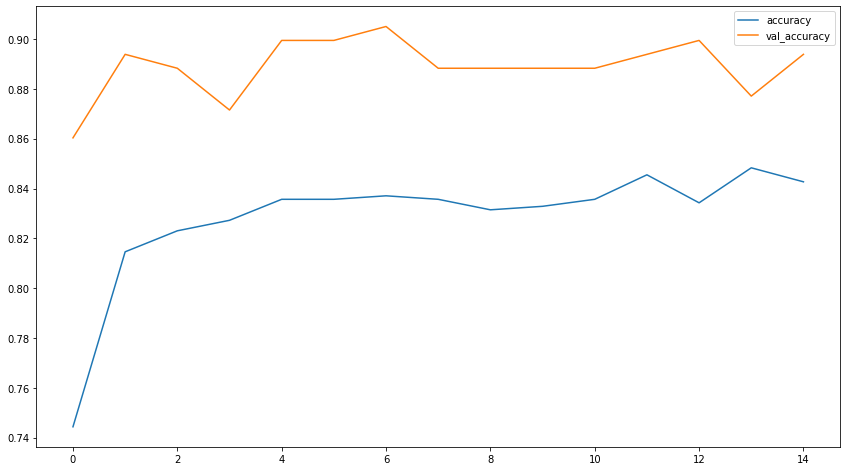

In [45]:
plt.figure(figsize=(16*0.9, 9*0.9))
plt.plot(treinamento.history['accuracy'], label='accuracy')
plt.plot(treinamento.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Dados de teste

In [46]:
test = pd.read_csv('test.csv')

In [47]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [49]:
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [50]:
nomes = test['Name'].str.split()
Ref = []
for i in range(len(nomes)):
    Ref.append(nomes[i][1])
Ref = pd.Series(Ref)
print(Ref.value_counts())
Ref2 = Ref.apply(lambda x: x if x in ['Mr.', 'Miss.', 'Mrs.', 'Master.'] else 'Other')
test['Ref'] = Ref2.map({'Other': 0,
                        'Mr.': 1,
                        'Miss.': 2,
                        'Mrs.': 3,
                        'Master.': 4})
print(test['Ref'].value_counts())

Mr.             234
Miss.            77
Mrs.             70
Master.          19
y                 4
Billiard,         2
Col.              2
Rev.              2
Planke,           1
Messemaeker,      1
Palmquist,        1
Carlo,            1
Ms.               1
Khalil,           1
Dr.               1
Brito,            1
dtype: int64
1    234
2     77
3     70
4     19
0     18
Name: Ref, dtype: int64


In [51]:
test['Embarked'] = test['Embarked'].map({'S': 1, 'C': 2, 'Q': 3}).fillna(0)

In [52]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ref
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1,3
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1,3


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
 11  Ref          418 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 39.3+ KB


In [54]:
test2 = KNNImputer().fit_transform(test[['Fare', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Ref']])

In [55]:
test['Fare_filled'] = test2[:, 0]

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
 11  Ref          418 non-null    int64  
 12  Fare_filled  418 non-null    float64
dtypes: float64(3), int64(7), object(3)
memory usage: 42.6+ KB


In [57]:
test.query('Fare != Fare_filled')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ref,Fare_filled
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,1,1,7.92832


In [58]:
test2 = KNNImputer().fit_transform(test[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare_filled', 'Embarked', 'Ref']])

In [59]:
test['Age_filled'] = test2[:, 0]

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
 11  Ref          418 non-null    int64  
 12  Fare_filled  418 non-null    float64
 13  Age_filled   418 non-null    float64
dtypes: float64(4), int64(7), object(3)
memory usage: 45.8+ KB


In [61]:
test.query('Age != Age_filled')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ref,Fare_filled,Age_filled
10,902,3,"Ilieff, Mr. Ylio",0,NaN,0,0,349220,7.8958,NaN,1,1,7.8958,26.0
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",1,NaN,0,0,PC 17598,31.6833,NaN,1,3,31.6833,31.0
29,921,3,"Samaan, Mr. Elias",0,NaN,2,0,2662,21.6792,NaN,2,1,21.6792,31.4
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",1,NaN,1,2,W./C. 6607,23.4500,NaN,1,3,23.4500,22.0
36,928,3,"Roth, Miss. Sarah A",1,NaN,0,0,342712,8.0500,NaN,1,2,8.0500,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",1,NaN,0,0,334915,7.7208,NaN,3,2,7.7208,27.0
410,1302,3,"Naughton, Miss. Hannah",1,NaN,0,0,365237,7.7500,NaN,3,2,7.7500,27.4
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,1,1,8.0500,25.6
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,1,1,8.0500,25.6


In [62]:
X = test[['Sex', 'Ref', 'Pclass', 'Fare_filled', 'Age_filled', 'Embarked', 'Parch', 'SibSp']]

In [63]:
escalador = StandardScaler()
X_escalado = escalador.fit_transform(X)

In [65]:
y_pred = modelo.predict(X_escalado)

In [70]:
sobreviveu = []
for i in range(len(y_pred)):
    sobreviveu.append(np.argmax(y_pred[i]))

In [71]:
resultados = pd.DataFrame(test['PassengerId'])

In [72]:
resultados['Survived'] = sobreviveu

In [73]:
resultados.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [74]:
resultados.to_csv('resultados.csv', index=False)